<font size="+5">#03. Arboles de Decision</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

Usamos la base de datos del **CIS** sobre una muestra de 2455, cuyas características son de aspecto sociológico. El `objetivo es determinar si una persona usa internet o no`.

```python
df = pd.read_csv('https://raw.githubusercontent.com/jesusloplar/data/main/uso_internet_espana.csv')
df.head()
```

In [1]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/jesusloplar/data/main/uso_internet_espana.csv')
df.head()

,uso_internet,sexo,edad,estudios
0,0,Mujer,66,Primaria
1,1,Hombre,72,Primaria
2,1,Hombre,48,Medios universitarios
3,0,Hombre,59,Superiores
4,1,Mujer,44,Superiores


# Transformación de los Datos

> 1. Las variables categóricas tienen valores de tipo `string` u `object`. Podéis consultarlo con `df.dtypes`.
> 2. El modelo no puede optimizarse si hay columnas de dichos tipos.
> 3. Deberíamos convertir las columnas categóricas a 0s y 1s. Es decir, **Variables Dummy**. Para ello, usaremos la función `pd.get_dummies(df)`.

In [12]:
df.dtypes
df = pd.get_dummies(df,drop_first=True)

# Seleccionar Variables

> 1. `Variable Objetivo y`
> 2. El resto las usaremos como `Variables Explicativas X`

In [13]:
target = df[['uso_internet']]
explanatory = df.drop('uso_internet')

KeyError: "['uso_internet'] not found in axis"

In [9]:
df.drop(columns='uso_internet')

,sexo,edad,estudios
0,Mujer,66,Primaria
1,Hombre,72,Primaria
2,Hombre,48,Medios universitarios
3,Hombre,59,Superiores
4,Mujer,44,Superiores
...,...,...,...
2450,Hombre,43,Primaria
2451,Mujer,18,Secundaria
2452,Mujer,54,Primaria
2453,Hombre,31,Secundaria


In [16]:
target = df[['uso_internet']]
explanatory = df.drop(labels='uso_internet', axis=1)

In [15]:
explanatory

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,66,1,0,1,0,0,0
1,72,0,0,1,0,0,0
2,48,0,1,0,0,0,0
3,59,0,0,0,0,0,1
4,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...
2450,43,0,0,1,0,0,0
2451,18,1,0,0,1,0,0
2452,54,1,0,1,0,0,0
2453,31,0,0,0,1,0,0


# Entrenar Modelo `DecisionTreeClassifier()`

> Antes de irte a la torera a buscar lo que hemos visto durante la sesión. Piensa que:
>
> 1. Solo queremos importar una cosa; el objeto `DecisionTreeClassifier`.
> 2. Por tanto: `from ... import DecisionTreeClassifier()`
> 3. Tan solo tienes que pensar qué colocar en lugar de `...`. Teniendo en cuenta que la librería de `sklearn` contiene todo lo relacionado con los modelos de **Machine Learning**.
> 4. **Disciplina Sotástica:** Puedes usar el tabulador `tab` para que Python te vaya sugiriendo...

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()

In [20]:
df.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['uso_internet', 'edad', 'sexo_Mujer', 'estudios_Medios universitarios',
        'estudios_Primaria', 'estudios_Secundaria', 'estudios_Sin estudios',
        'estudios_Superiores'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=2455, step=1)
 IntBlock: slice(0, 2, 1), 2 x 2455, dtype: int64
 IntBlock: slice(2, 8, 1), 6 x 2455, dtype: uint8,
 '_item_cache': {},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>}

In [21]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'ccp_alpha': 0.0}

In [23]:
model.fit(X=explanatory, y=target)

DecisionTreeClassifier()

In [24]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 7,
 'n_features_': 7,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=int64),
 'n_classes_': 2,
 'max_features_': 7,
 'tree_': <sklearn.tree._tree.Tree at 0x18164275b20>}

# Explicación Algoritmo Árbol de Decisión

> _Durante la corrección te explicare en detalle el funcionamiento de este algoritmo. Mientras tanto, podéis ver el vídeo que usaré para que os relacionéis con los conceptos:_
>
> - https://www.youtube.com/watch?v=7VeUPuFGJHk

# Interpretar Modelo

> - ¿Cómo se ha situado la variable en el **Nodo Raíz**? ¿Es la **variable más importante**? ¿Por qué?

# Realizar Predicciones

> ¿No crees que si existe un modelo para calcular la ecuación matemática del árbol, probablemente habrá otro para **aplicar la ecuación matemática** sustituyendo por las variables de entrada, `explicativas X`?

In [25]:
juana = df.sample()

In [26]:
juana

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
1825,1,29,1,0,0,0,0,0


In [27]:
input_juana = juana.drop(columns='uso_internet')

In [28]:
model.predict(juana)

ValueError: X has 8 features, but DecisionTreeClassifier is expecting 7 features as input.

In [29]:
juana

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
1825,1,29,1,0,0,0,0,0


In [30]:
model.predict(input_juana)

array([1], dtype=int64)

In [31]:
model.predict_proba(input_juana)

array([[0.33333333, 0.66666667]])

# Visualizar Modelo

> 1. Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> 2. Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

In [33]:
from sklearn import tree

In [ ]:
tree.plot_tree()

In [ ]:
t

In [32]:
from sklearn.tree import plot_tree

In [32]:
from sklearn.tree import 

In [35]:
import matplotlib.pyplot as plt

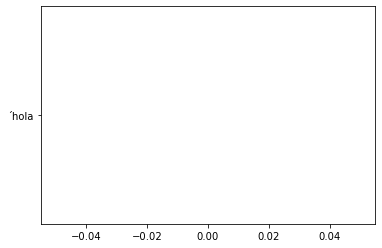

In [36]:
plt.plot('´hola')

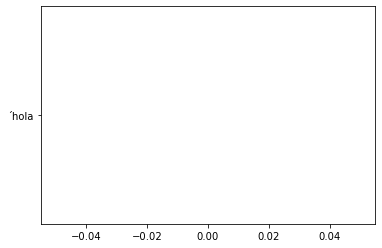

In [37]:
plt.plot('´hola');

In [46]:
model = DecisionTreeClassifier(min_samples_leaf=100)

In [47]:
model.fit(X=explanatory, y=target)

DecisionTreeClassifier(min_samples_leaf=100)

In [52]:
explanatory.columns

Index(['edad', 'sexo_Mujer', 'estudios_Medios universitarios',
       'estudios_Primaria', 'estudios_Secundaria', 'estudios_Sin estudios',
       'estudios_Superiores'],
      dtype='object')

In [55]:
juana

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
1825,1,29,1,0,0,0,0,0


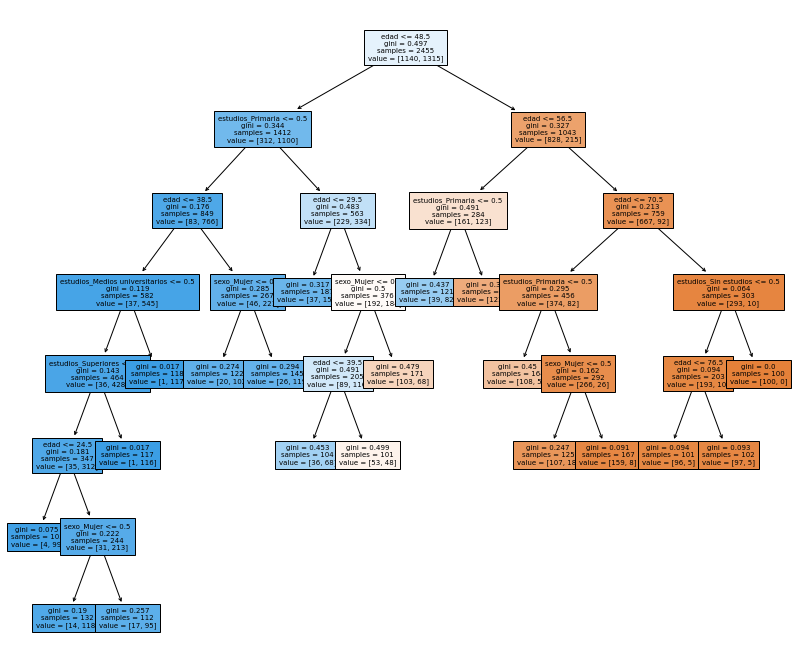

In [54]:
plt.figure(figsize=(14,12))
plot_tree(decision_tree=model, fontsize=7, feature_names=explanatory.columns,filled=True);

In [56]:
95/112

0.8482142857142857

In [57]:
model.predict_proba(input_juana)

array([[0.15178571, 0.84821429]])

# Realidad vs Predicciones

> ¿Cómo de bueno es nuestro modelo?
>
> 1. Si pasamos las predicciones como una nuevo columna del `DataFrame`, podremos observar que **las predicciones de nuestro modelo pueden no coincidir con la realidad**.
>
>    - `df['pred'] = predicciones`
>
> 2. ¿Cómo medimos el **error de nuestro modelo**? ¿Cómo de bueno es nuestro modelo para describir la realidad?
>    - `df.sample(10)` para comprobar si las predicciones de nuestro modelo coinciden con la realidad...

In [60]:
df

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,0,66,1,0,1,0,0,0
1,1,72,0,0,1,0,0,0
2,1,48,0,1,0,0,0,0
3,0,59,0,0,0,0,0,1
4,1,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2450,1,43,0,0,1,0,0,0
2451,1,18,1,0,0,1,0,0
2452,0,54,1,0,1,0,0,0
2453,1,31,0,0,0,1,0,0


In [58]:
model.predict_proba(X=explanatory)

array([[0.95209581, 0.04790419],
       [0.95049505, 0.04950495],
       [0.16393443, 0.83606557],
       ...,
       [0.74846626, 0.25153374],
       [0.10606061, 0.89393939],
       [0.74846626, 0.25153374]])

In [59]:
type(model.predict_proba(X=explanatory))

numpy.ndarray

In [61]:
model.predict_proba(X=explanatory).iloc

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [64]:
model.predict_proba(X=explanatory)[:,1]

array([0.04790419, 0.04950495, 0.83606557, ..., 0.25153374, 0.89393939,
       0.25153374])

In [65]:
3 > 0.5

True

In [66]:
model.predict_proba(X=explanatory)[:,1]>0.5

array([False, False,  True, ..., False,  True, False])

In [67]:
a = model.predict_proba(X=explanatory)[:,1]>0.5

In [68]:
import numpy as np

In [70]:
predicciones = np.where(a, 1, 0)

In [73]:
(predicciones == model.predict(X=explanatory)).mean()

1.0

In [76]:
dfsel = df[['uso_internet']].copy()

In [78]:
dfsel.insert(loc=1, column='pred_dt', value=predicciones)

In [79]:
dfsel

,uso_internet,pred_dt
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
2450,1,0
2451,1,1
2452,0,0
2453,1,1


In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
from sklearn.neighbors import KNeighborsClassifier 

In [87]:
lr = LogisticRegression(max_iter=1000).fit(X=explanatory, y=df['uso_internet'])

In [88]:
kn = KNeighborsClassifier().fit(X=explanatory, y=df['uso_internet'])

In [89]:
dfsel['pred_lr'] = lr.predict(X=explanatory)
dfsel['pred_kn'] = kn.predict(X=explanatory)

In [90]:
dfsel

,uso_internet,pred_dt,pred_lr,pred_kn
0,0,0,0,0
1,1,0,0,0
2,1,1,1,1
3,0,0,1,1
4,1,1,1,1
...,...,...,...,...
2450,1,0,0,1
2451,1,1,1,1
2452,0,0,0,0
2453,1,1,1,1


# Matriz de Confusión

> 1. Usar la función `confusion_matrix()`, o `plot_confusion_matrix()`
> 2. ¿Qué representa cada número?

# Otrás Métricas

> Siempre tomaremos como `referencia la realidad (por filas)`. Imaginando que estamos prediciendo si una persona tiene COVID o no, nos preguntaremos:

## Sensitividad

> - Dentro de las personas que, realmente, `tienen COVID (1)`, cuántas predice nuestro modelo como que tienen COVID (1)?

## Especificidad

> - Dentro de las personas que, realmente, `NO tienen COVID (0)`, cuántas predice nuestro modelo como que NO tienen COVID (0)?

## Classification Report

> 1. Usaremos la función `classification_report()`
> 2. Guardamos el objeto resultante en `reporte`
> 3. Coinciden algunos de los números de la tabla, `print(reporte)`, con los que hemos calculado anteriormente?

## Curva ROC

> - Usaremos la función `plot_roc_curve()`
>
> _PD: Durante la corrección te explicare en detalle el funcionamiento la Curva ROC. Mientras tanto puedes hacer uso del vídeo que usaré:_
>
> - https://www.youtube.com/watch?v=7VeUPuFGJHk

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender cómo se usan los **Algoritmos de Árboles**.
- [ ] Entender otra forma de **comparar los datos reales con las predicciones** del modelo.
- [ ] No todas las visualizaciones de modelos son iguales. En este caso también podemos **visualizar un árbol** para interpretar el modelo.
- [ ] Distinguir el papel de la **probabilidad** a la hora de optimizar este tipo de modelos.
- [ ] Saber determinar **por qué una variable es importante** en el modelo. Es decir, por qué aporta diferencias significativas.
- [ ] Entender la necesidad de **normalizar** los datos.